In [1]:
import numpy as np
import pandas as pd
df0 = pd.read_csv(r"G:\Python Projects,Docs\Machine learning\rainfall detection\district wise rainfall normal.csv")

In [2]:
df0

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,KERALA,IDUKKI,13.4,22.1,43.6,150.4,232.6,651.6,788.9,527.3,308.4,343.2,172.9,48.1,3302.5,35.5,426.6,2276.2,564.2
637,KERALA,KASARGOD,2.3,1.0,8.4,46.9,217.6,999.6,1108.5,636.3,263.1,234.9,84.6,18.4,3621.6,3.3,272.9,3007.5,337.9
638,KERALA,PATHANAMTHITTA,19.8,45.2,73.9,184.9,294.7,556.9,539.9,352.7,266.2,359.4,213.5,51.3,2958.4,65.0,553.5,1715.7,624.2
639,KERALA,WAYANAD,4.8,8.3,17.5,83.3,174.6,698.1,1110.4,592.9,230.7,213.1,93.6,25.8,3253.1,13.1,275.4,2632.1,332.5


In [3]:
df0["JAN"]

0      107.3
1       43.7
2       32.7
3       42.2
4       33.3
       ...  
636     13.4
637      2.3
638     19.8
639      4.8
640     20.8
Name: JAN, Length: 641, dtype: float64

<Axes: >

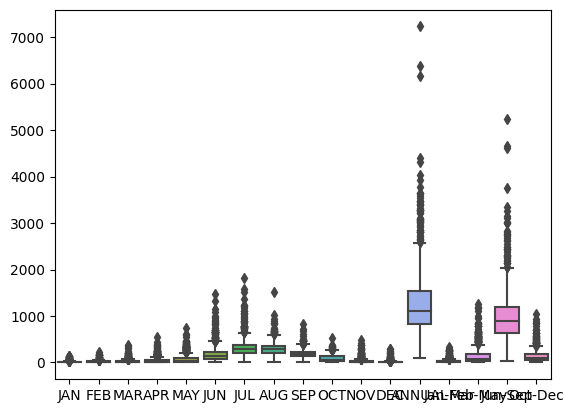

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df0)


we found out the loads of outliers but didnt remove them just now because there can be a scarcity of data but will remove them depending on the model's performance 

In [5]:
y = df0["JAN"]

In [6]:
df0.columns

Index(['STATE_UT_NAME', 'DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
       'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb',
       'Mar-May', 'Jun-Sep', 'Oct-Dec'],
      dtype='object')

## had two object type columns and encoded with frequency encoding 
(didnt use because 'OHE' there would be too many featues that can overfit the model) 

In [7]:
state_name=df0["STATE_UT_NAME"].value_counts().to_dict()
district = df0["DISTRICT"].value_counts().to_dict()

In [8]:
state=df0["STATE_UT_NAME"].map(state_name)

In [9]:
state
district=df0["DISTRICT"].map(district)

In [10]:
df0.drop(columns=["STATE_UT_NAME","DISTRICT"],inplace=True)

In [11]:
df1=df0.join([state,district])

In [12]:
lst = df1.corrwith(df1["JAN"])
lst                                     #have to remove the higly and very lowly corelated features

JAN              1.000000
FEB              0.868628
MAR              0.688776
APR              0.343254
MAY              0.154175
JUN             -0.030926
JUL             -0.007617
AUG              0.027202
SEP              0.014375
OCT              0.002580
NOV              0.114688
DEC              0.417925
ANNUAL           0.163069
Jan-Feb          0.956722
Mar-May          0.342612
Jun-Sep         -0.003460
Oct-Dec          0.138793
STATE_UT_NAME   -0.206120
DISTRICT         0.034260
dtype: float64

### we get a visual representaion of the co-dependency among the features with a heatmap

<Axes: >

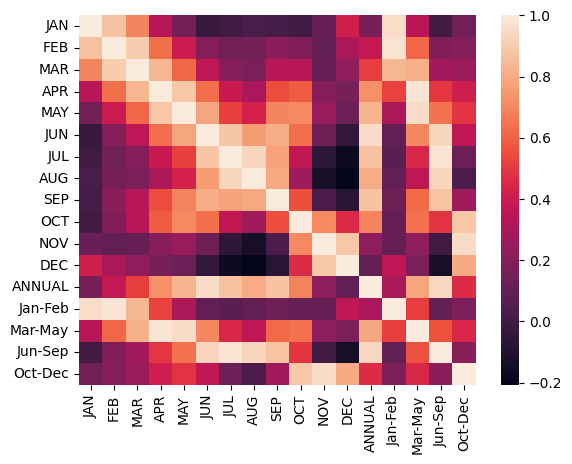

In [13]:
corr_matrix=df0.corr()
sns.heatmap(corr_matrix)


In [14]:
df1.isna().sum()
df2=df1.drop(columns=["JAN",'Jan-Feb','Jun-Sep','Oct-Dec',"JUN","JUL","AUG","SEP","OCT","STATE_UT_NAME","DISTRICT"])
x = df2


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)

print(x_train,y_train)

      FEB    MAR    APR   MAY   NOV   DEC  ANNUAL  Mar-May
272  46.8   47.4   25.5  46.7   8.1  21.0  1157.3    119.6
299  15.8   12.6    9.5   9.9   4.7   7.5   624.1     32.0
229   9.0    9.0    5.7  19.2   7.1   4.2  1121.3     33.9
395   5.3    2.7    3.0  10.1   4.9   3.0   613.9     15.8
172   9.5    9.3   30.8  79.3   5.7  12.1  1293.3    119.4
..    ...    ...    ...   ...   ...   ...     ...      ...
98   22.2   19.8   37.8  78.8  11.4   6.0  1315.2    136.4
322  21.0   25.8    9.5  14.1   5.4  10.6   568.0     49.4
382   0.5    1.6    0.9   5.2  12.6   3.2   883.0      7.7
365  72.9  119.1  121.3  90.8  28.6  39.9   818.7    331.2
510  13.2   17.7   10.2  11.4  13.4  11.9  1292.7     39.3

[512 rows x 8 columns] 272    46.2
299    20.6
229    15.8
395     5.0
172    11.1
       ... 
98     10.7
322    27.6
382     2.8
365    48.5
510    15.9
Name: JAN, Length: 512, dtype: float64


In [16]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()


## *Now lets train and predict with the model*
 ### using linear regression at first


In [17]:
model.fit(x_train,y_train)

LinearRegression()

In [18]:
from sklearn.metrics import accuracy_score,mean_squared_error
import math
#accuracy_score(model.predict(x_test),y_test)
print("The accuracy using a simple linear regression model is : ",model.score(x_test,y_test)*100,"%")
#mean_squared_error(model.predict(x_test),y_test)


The accuracy using a simple linear regression model is :  89.42440013260415 %


### using random forest regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
model2.fit(x_train,y_train)

RandomForestRegressor()

In [20]:
print("The accuracy using random forest regression model is : ",model2.score(x_test,y_test)*100,"%")

The accuracy using random forest regression model is :  86.91082413802876 %


### Moving forward to implementation part with the linear regression model accuracy of nearly 90%

In [21]:
import joblib
joblib.dump(model,"Rain_model.pkl")

['Rain_model.pkl']